In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data = pd.read_csv('../ml-project-data/NIFTY_train.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)

nifty_data = nifty_data.drop(['Open', 'High', 'Low', 'Close'], axis=1)

y_lag = pd.DataFrame()
for i in range(5,0,-1):
    y_lag['t-'+str(i)] = nifty_data['Average'].shift(i)
y_lag['t'] = nifty_data['Average'].values
y = y_lag

nifty_data = pd.concat([nifty_data,y], axis = 1)
nifty_data = nifty_data.drop(['t'], axis = 1)

nifty_data = nifty_data.iloc[5:]

In [3]:
nifty_data_test = pd.read_csv('../ml-project-data/NIFTY_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

In [4]:
model = VAR(endog=nifty_data)

model = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [5]:
prediction = model.forecast(model.y, steps=int(len(nifty_data_test)))

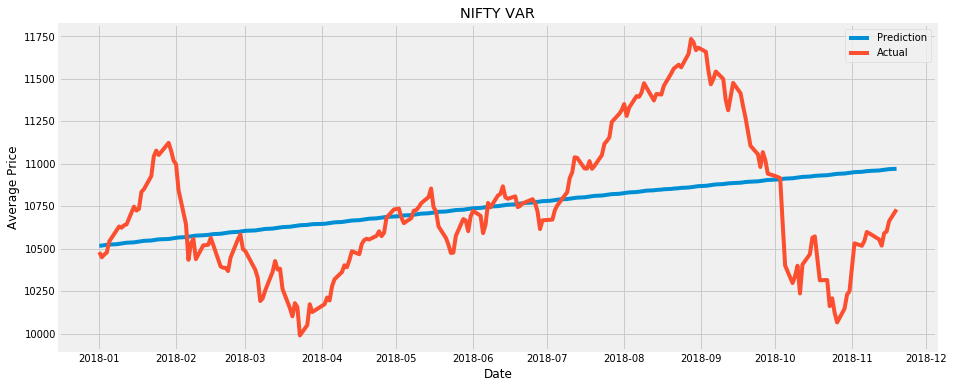

In [6]:
plt.figure(figsize=(14,6))
plt.plot(nifty_data_test['Average'].index, prediction[:, 2], label="Prediction")
plt.plot(nifty_data_test['Average'].index, nifty_data_test['Average'], label="Actual")
plt.ylabel("Average Price")
plt.xlabel('Date')
plt.title("NIFTY VAR")
plt.legend(loc="best")
plt.show()

In [7]:
print('RMSE: ', np.sqrt(mean_squared_error(prediction[:,2], nifty_data_test['Average'][:len(prediction[:,2])])))

print('MAPE: ', np.mean(np.abs((nifty_data_test['Average'][:len(prediction[:,2])] - prediction[:,2]) / nifty_data_test['Average'][:len(prediction[:,2])])) * 100)

RMSE:  380.223977393043
MAPE:  2.7421566289649615


In [8]:
def company_without_nifty(company):
    
    if(company == 1):
        TCS_data = pd.read_csv('../ml-project-data/TCS_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/TCS_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        
        title = 'TCS VAR w/o NIFTY'
        
    if(company == 2):
        TCS_data = pd.read_csv('../ml-project-data/INFY_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/INFY_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'INFY VAR w/o NIFTY'
        
    if(company == 3):
        TCS_data = pd.read_csv('../ml-project-data/TECHM_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/TECHM_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'TECHM VAR w/o NIFTY'
        
    if(company == 4):
        TCS_data = pd.read_csv('../ml-project-data/HCL_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/HCL_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'HCL VAR w/o NIFTY'
        
    if(company == 5):
        TCS_data = pd.read_csv('../ml-project-data/WIPRO_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/WIPRO_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'WIPRO VAR w/o NIFTY'
        
    y_lag = pd.DataFrame()
    for i in range(5,0,-1):
        y_lag['t-'+str(i)] = TCS_data['Average Price'].shift(i)
    y_lag['t'] = TCS_data['Average Price'].values
    y = y_lag

    TCS_data = pd.concat([TCS_data,y], axis = 1)
    TCS_data = TCS_data.drop(['t'], axis = 1)

    TCS_data = TCS_data.iloc[5:]



    model_TCS = VAR(endog=TCS_data)

    model_TCS = model_TCS.fit()

    prediction_TCS = model_TCS.forecast(model_TCS.y, steps=int(len(TCS_data_test)))

    plt.figure(figsize=(14,6))
    plt.plot(TCS_data_test['Average Price'].index, prediction_TCS[:, 0], label="Prediction")
    plt.plot(TCS_data_test['Average Price'].index, TCS_data_test['Average Price'], label="Actual")
    plt.ylabel("Average Price")
    plt.xlabel('Date')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()
    
    print('RMSE: ', np.sqrt(mean_squared_error(prediction_TCS[:,0], TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])))

    print('MAPE: ', np.mean(np.abs((TCS_data_test['Average Price'][:len(prediction_TCS[:,2])] - prediction_TCS[:,0]) / TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])) * 100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


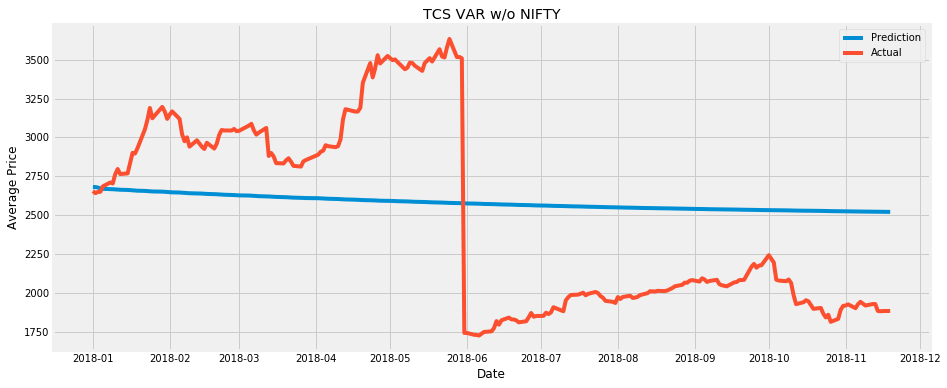

RMSE:  585.6584321621915
MAPE:  23.322750173938207


In [9]:
company_without_nifty(1) #TCS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


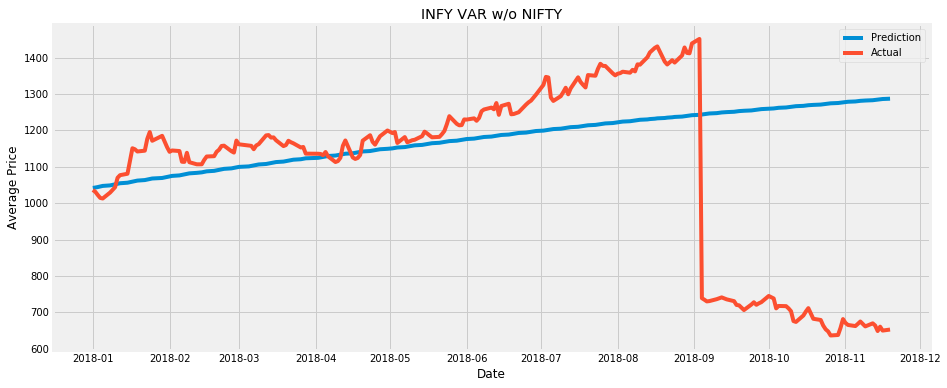

RMSE:  284.7661268140489
MAPE:  23.260573235781695


In [10]:
company_without_nifty(2) #INFY

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


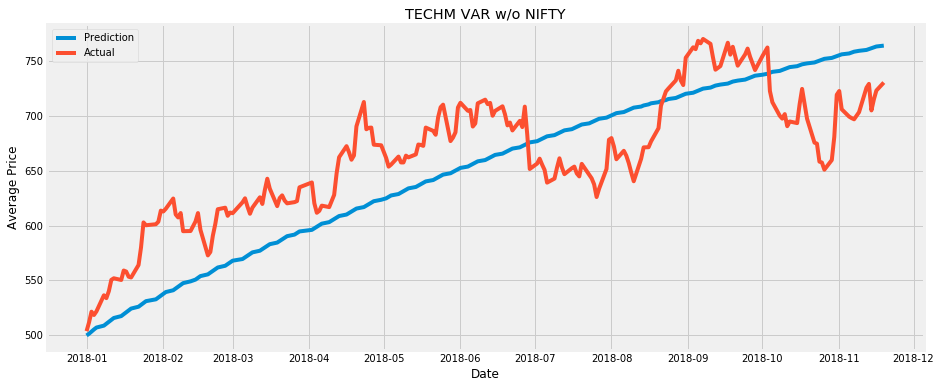

RMSE:  44.744399434904814
MAPE:  6.1764025512634735


In [11]:
company_without_nifty(3) #TECHM

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


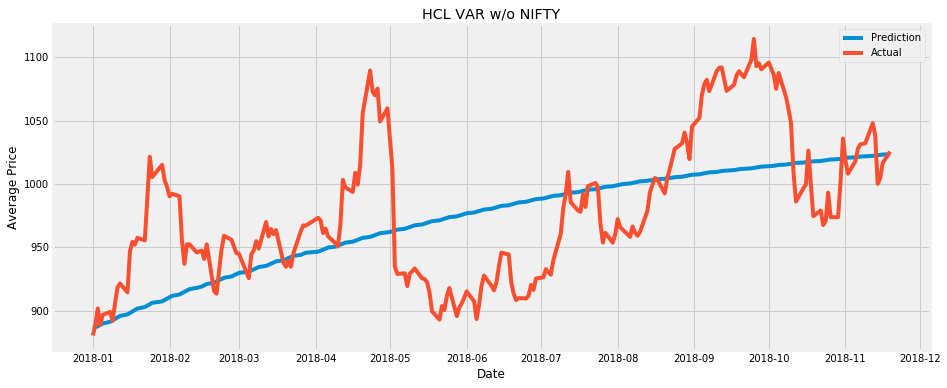

RMSE:  50.59836976690613
MAPE:  4.198930003821589


In [12]:
company_without_nifty(4) #HCL

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


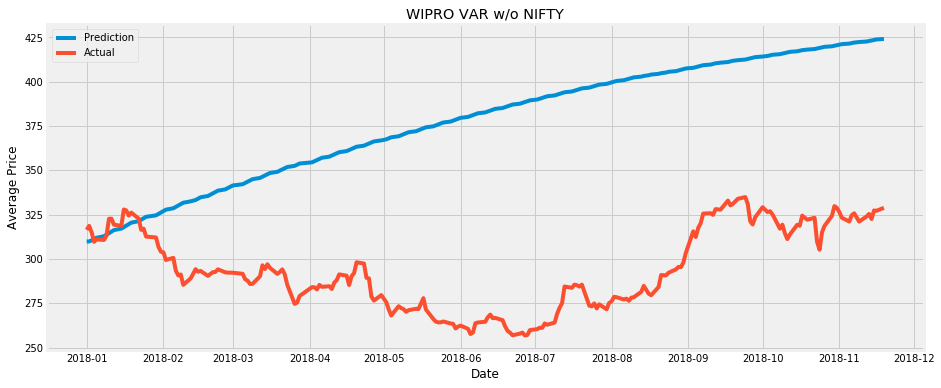

RMSE:  91.99122292936308
MAPE:  29.432541168796085


In [13]:
company_without_nifty(5) #WIPRO

In [14]:
def company_with_nifty(company):
    
    if(company == 1):
        TCS_data = pd.read_csv('../ml-project-data/TCS_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/TCS_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        
        title = 'TCS VAR w NIFTY'
        
    if(company == 2):
        TCS_data = pd.read_csv('../ml-project-data/INFY_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/INFY_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'INFY VAR w NIFTY'
        
    if(company == 3):
        TCS_data = pd.read_csv('../ml-project-data/TECHM_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/TECHM_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'TECHM VAR w NIFTY'
        
    if(company == 4):
        TCS_data = pd.read_csv('../ml-project-data/HCL_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/HCL_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'HCL VAR w NIFTY'
        
    if(company == 5):
        TCS_data = pd.read_csv('../ml-project-data/WIPRO_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

        TCS_data_test = pd.read_csv('../ml-project-data/WIPRO_test.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)

        title = 'WIPRO VAR w NIFTY'
        
    y_lag = pd.DataFrame()
    for i in range(5,0,-1):
        y_lag['t-'+str(i)] = TCS_data['Average Price'].shift(i)
    y_lag['t'] = TCS_data['Average Price'].values
    y = y_lag

    TCS_data = pd.concat([TCS_data,y], axis = 1)
    TCS_data = TCS_data.drop(['t'], axis = 1)

    TCS_data = TCS_data.iloc[5:]



    model_TCS = VAR(endog=TCS_data, exog=nifty_data)

    model_TCS = model_TCS.fit()

    prediction_TCS = model_TCS.forecast(model_TCS.y, steps=int(len(TCS_data_test)), exog_future=prediction)

    plt.figure(figsize=(14,6))
    plt.plot(TCS_data_test['Average Price'].index, prediction_TCS[:, 0], label="Prediction")
    plt.plot(TCS_data_test['Average Price'].index, TCS_data_test['Average Price'], label="Actual")
    plt.ylabel("Average Price")
    plt.xlabel('Date')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()
    
    print('RMSE: ', np.sqrt(mean_squared_error(prediction_TCS[:,0], TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])))

    print('MAPE: ', np.mean(np.abs((TCS_data_test['Average Price'][:len(prediction_TCS[:,2])] - prediction_TCS[:,0]) / TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])) * 100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


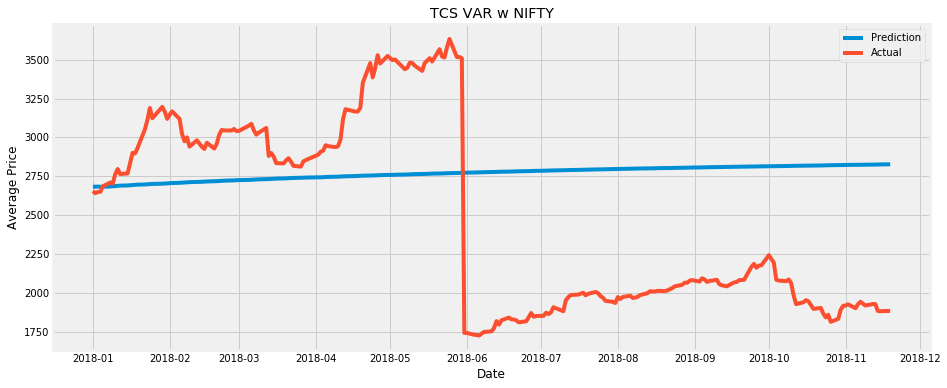

RMSE:  694.8295589437141
MAPE:  28.70074624609545


In [15]:
company_with_nifty(1) #TCS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


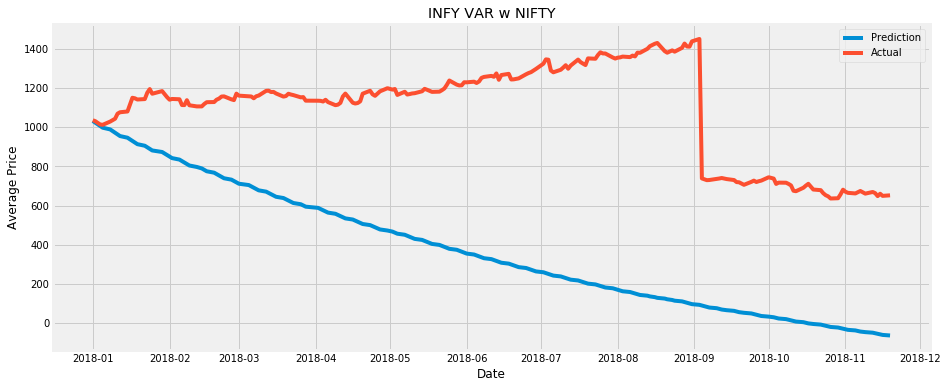

RMSE:  786.8385213075269
MAPE:  67.18116717624271


In [16]:
company_with_nifty(2) #INFY

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


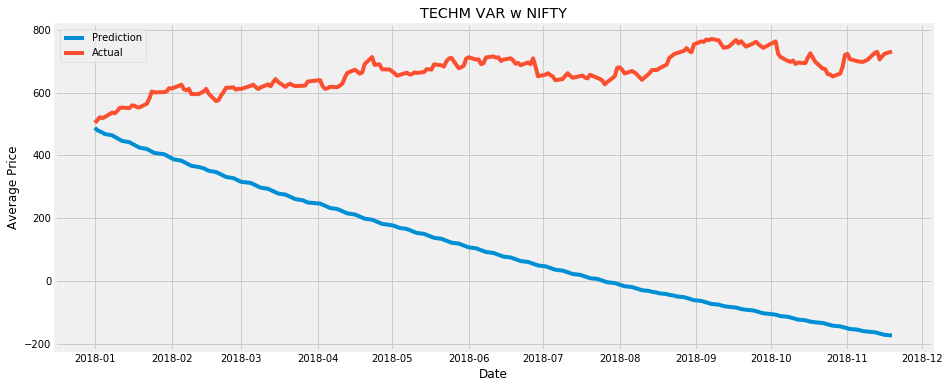

RMSE:  599.6942453158327
MAPE:  80.64155900326246


In [17]:
company_with_nifty(3) #TECHM

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


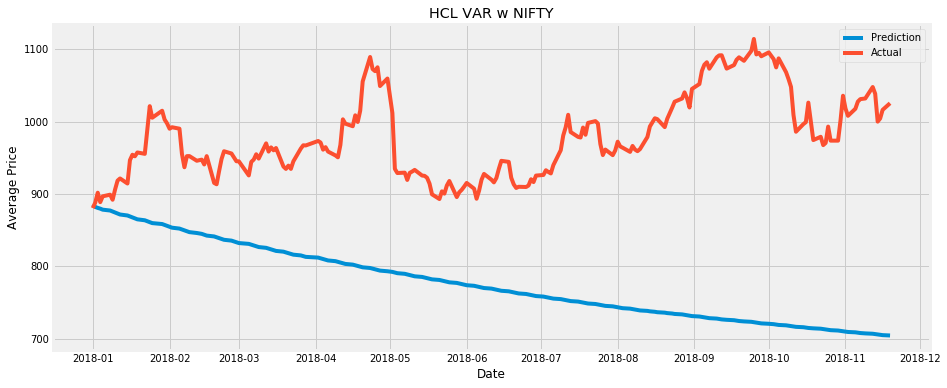

RMSE:  220.25381776460605
MAPE:  20.0095953400094


In [18]:
company_with_nifty(4) #HCL

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


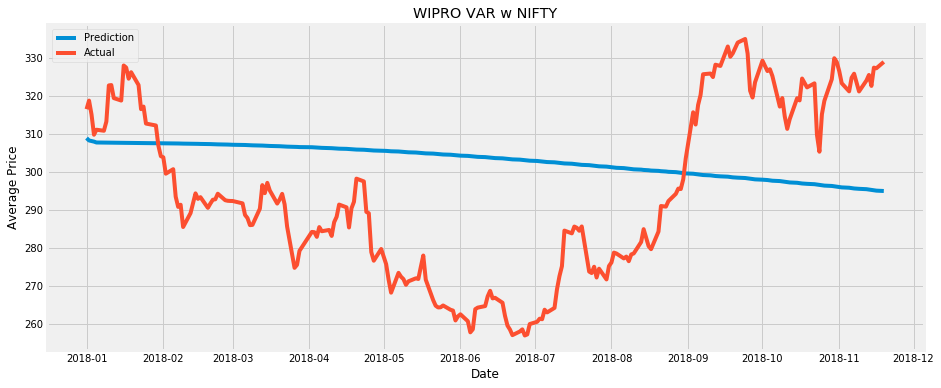

RMSE:  26.29028955525635
MAPE:  8.282934307028086


In [19]:
company_with_nifty(5) #WIPRO